C:\Users\DELL\AppData\Local\Temp\ipykernel_1016\137326160.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  M.fillna(method='ffill', inplace=True)


         C1        C2
0 -0.489949 -0.679976
1 -0.519099  0.544827
2  0.330633  0.268879
3 -0.481656 -0.097611
4 -0.563512 -0.482506


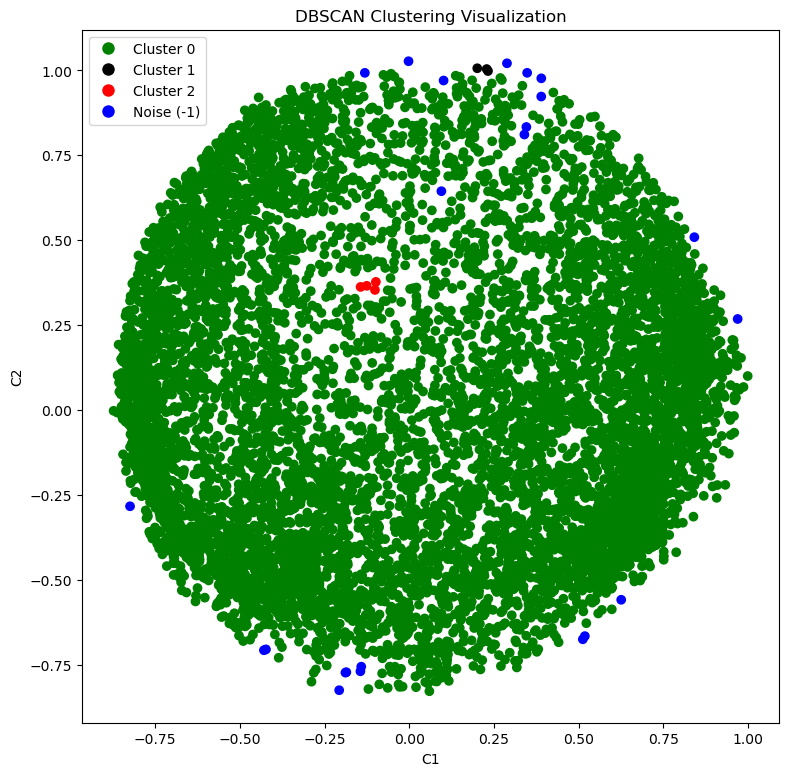

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

# Step 2: Loading the Data
# Loading the data inside an initialized variable
M = pd.read_csv('sampleDataset.csv')  # Path of dataset file

# Dropping the CUST_ID column from the dataset
M = M.drop('CUST_ID', axis=1)

# Handling missing values
M.fillna(method='ffill', inplace=True)

# Printing dataset head
# print(M.head())

# Step 3: Preprocessing the Data
# Standardizing the data
scalerFD = StandardScaler()
M_scaled = scalerFD.fit_transform(M)

# Normalizing the scaled data
M_normalized = normalize(M_scaled)

# Converting numpy arrays into a pandas DataFrame
M_normalized = pd.DataFrame(M_normalized)

# Step 4: Reduce the dimensionality of the data
# Applying PCA to reduce data to 2 dimensions
pcaFD = PCA(n_components=2)
M_principal = pcaFD.fit_transform(M_normalized)

# Creating a DataFrame from the transformed data
M_principal = pd.DataFrame(M_principal, columns=['C1', 'C2'])

# Printing the head of the transformed data
print(M_principal.head())

# Step 5: Build a clustering model
# Creating a clustering model using DBSCAN
db_default = DBSCAN(eps=0.0375, min_samples=3).fit(M_principal)

# Labelling the clusters
labeling = db_default.labels_

# Step 6: Visualize the clustering model
# Define colors for visualization
colours = {
    0: 'g',  # Green for cluster 0
    1: 'k',  # Black for cluster 1
    2: 'r',  # Red for cluster 2
    -1: 'b'  # Blue for noise points
}

# Creating a color vector for each data point
cvec = [colours[label] if label in colours else 'y' for label in labeling]

# Plotting the data points
plt.figure(figsize=(9, 9))
plt.scatter(M_principal['C1'], M_principal['C2'], c=cvec)

# Building the legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='g', markersize=10, label='Cluster 0'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='k', markersize=10, label='Cluster 1'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='r', markersize=10, label='Cluster 2'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='b', markersize=10, label='Noise (-1)'),
]
plt.legend(handles=legend_elements, loc='upper left', scatterpoints=1, fontsize=10)

# Adding titles and labels
plt.title('DBSCAN Clustering Visualization')
plt.xlabel('C1')
plt.ylabel('C2')

# Display the plot
plt.show()